<a href="https://colab.research.google.com/github/haakusi/dacon/blob/main/%5B%ED%88%AC%EB%8D%B0%EC%9D%B4_1%ED%8E%B8%5D_%EA%B8%88%EC%9C%B5_%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%88%98%EC%A7%91%F0%9F%92%A5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

안녕하세요, 데이크루 3기 ‘투데이💰︎' 팀입니다!

**팀 투데이**는 “투자에 데이터를 이용하다"의 약자입니다. 

금융 데이터 수집&가공&모델링을 학습하면서 **Financial Domain Knowledge와 Data Analysis Technologies 향상**을 목적으로 하고 있습니다.
<br><br>

저희는 금융데이터와 AI기술이 만나는 전반적인 과정을 학습하고, 학습한 내용을 바탕으로 데이콘 이용자분들을 위한 콘텐츠를 제작하고 있습니다. ‘투데이💰︎’의 첫번째 포스팅의 주제는 ‘금융 데이터수집’입니다. 

아래 링크를 들어가시면 ‘투데이💰︎’의 전 커리큘럼을 보실 수 있습니다. 

→ [투데이_1편] 금융 데이터수집💥 

<br>


📥 PDF파일에 1편 내용이 요약되어 있으니 참고 부탁드리겠습니다. <br>
본 포스팅은 데이콘 서포터즈 “데이크루" 3기 활동의 일환입니다.

# **PDF**

PDF 파일 첨부

# **코드**

## ✏️ 금융 데이터 수집
1. 주가 데이터 수집
2. 거시경제 데이터 수집
3. 기업 공시데이터 수집
4. 금융데이터 핸들링
5. 백테스팅 API 활용법

# 1. 주가 데이터 수집

## 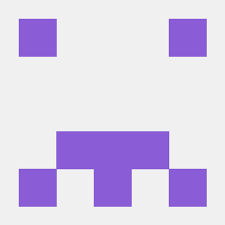 1-1. Pykrx 

https://github.com/sharebook-kr/pykrx <br><br>
Pykrx는 (NAVER·KRX) 에서 주가정보를 스크래핑 합니다. <br>
국내 주가데이터 수집에 특화된 함수가 많습니다. 장중에 사용할 경우, 지연율이 높습니다. <br>

대표적으로 사용하는 함수 세가지를 살펴보겠습니다. <br>
- get_index_ticker_list(index) : 모든 지수(index)의 티커 조회
- get_market_trading_value_by_date(fromdate, todate, ticker) : 투자자별 거래실적 일별추이
- stock.get_index_ohlcv(fromdate, todate, ticker) : 특정 종목의 지정된 기간 OHLCV 조회 (...거래대금, 지수명, 코스피외국주포함)

In [ ]:
! pip install pykrx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 97 kB 3.9 MB/s 
     |████████████████████████████████| 52 kB 459 kB/s 
     |████████████████████████████████| 251 kB 47.1 MB/s 


In [ ]:
import pandas as pd
import numpy as np

from pykrx import stock
from pykrx import bond

### get_index_ticker_list(index) <br>
: 모든 지수(index)의 티커 조회

In [ ]:
for ticker in stock.get_index_ticker_list()[:10]:
    tickerName = stock.get_index_ticker_name(ticker)
    print(ticker, tickerName)

1001 코스피
1002 코스피 대형주
1003 코스피 중형주
1004 코스피 소형주
1005 음식료품
1006 섬유의복
1007 종이목재
1008 화학
1009 의약품
1010 비금속광물


### get_market_trading_value_by_date(fromdate, todate, ticker) 
: 투자자별 거래실적 일별추이

In [ ]:
samsungTradingResult = stock.get_market_trading_value_by_date("20220101","20220505","005930")
print(samsungTradingResult.head())

                    기관합계        기타법인            개인         외국인합계  전체
날짜                                                                  
2022-01-03 -329791819300  4774451400  184943470500  140073897400   0
2022-01-04 -206326913300  1908886100   91958901300  112459125900   0
2022-01-05 -598003977100 -8062754100  649419857800  -43353126600   0
2022-01-06 -171750680700  3976748900   -3254631500  171028563300   0
2022-01-07 -165044032600 -3880739900 -171571901600  340496674100   0


### get_index_ohlcv(fromdate, todate, ticker) 
: 특정 종목의 지정된 기간 OHLCV 조회 (시가 고가 저가 종가 거래량 거래대금 지수명 코스피외국주포함..)

In [ ]:
kospi = stock.get_index_ohlcv("20190101", "20220711", "1001")
kospi[:10]

코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2019-01-02,2050.55,2053.45,2004.27,2010.00,326367773,4295871822881,1323645396533233
2019-01-03,2011.81,2014.72,1991.65,1993.70,427976017,5358519356361,1312758913016841
2019-01-04,1992.40,2011.56,1984.53,2010.25,408990897,5490147620731,1323719372668579
2019-01-07,2034.24,2048.06,2030.90,2037.10,440191435,5301385184683,1342381870636242
2019-01-08,2038.68,2042.70,2023.59,2025.27,397831202,4826641977635,1333996220969886
2019-01-09,2034.19,2068.23,2034.19,2064.71,386247767,5532688944833,1360852002032056
2019-01-10,2065.73,2072.81,2057.16,2063.28,382877104,5434257496719,1359857820274138
2019-01-11,2070.36,2076.99,2063.99,2075.57,380061043,4592460536252,1368311381419713
2019-01-14,2070.49,2073.94,2059.46,2064.52,432890569,4941021266486,1360565230505129


##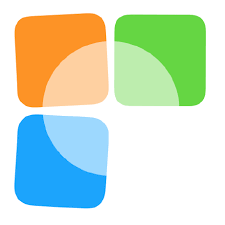 1-2. FinanceDataReader

https://github.com/FinanceData/FinanceDataReader/wiki/<br><br>
FinanceDataReader는 (위키피디아·FRED·Investing·krx·nasdaq) 에서 주가정보를 스크래핑 합니다. <br>
한국/미국 주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리 입니다.

대표적으로 사용하는 함수 두가지를 살펴보겠습니다. <br>
- DataReader(symbol, start, end, exchange, data_source) : 거래소 및 소스에서 가격 데이터 조회
- StockListing(market) : 증권 거래소의 주식 목록 조회

In [ ]:
!pip install finance_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import FinanceDataReader as fdr

### DataReader(symbol, start, end, exchange, data_source)
: read price data from various exchanges or data source. <br>


In [ ]:
APPLE = fdr.DataReader('AAPL','2022')
APPLE.head(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2022-01-03,182.01,177.83,182.88,177.71,104700000.0,0.0250
2022-01-04,179.70,182.63,182.94,179.12,99310000.0,-0.0127
2022-01-05,174.92,179.61,180.17,174.64,94540000.0,-0.0266
2022-01-06,172.00,172.70,175.30,171.64,96900000.0,-0.0167
2022-01-07,172.17,172.89,174.14,171.03,86710000.0,0.0010


In [ ]:
KOSPI_INDEX = fdr.DataReader('KS11', '2020-01-01')
KOSPI_INDEX.head(5)

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,2175.17,2201.21,2202.32,2171.84,494680000.0,-0.0102
2020-01-03,2176.46,2192.58,2203.38,2165.39,631560000.0,0.0006
2020-01-06,2155.07,2154.97,2164.42,2149.95,592670000.0,-0.0098
2020-01-07,2175.54,2166.60,2181.62,2164.27,568240000.0,0.0095
2020-01-08,2151.31,2156.27,2162.32,2137.72,913830000.0,-0.0111


            NASDAQCOM       M2
DATE                          
1971-02-05     100.00      NaN
1971-02-08     100.84      NaN
1971-02-09     100.76      NaN
1971-02-10     100.69      NaN
1971-02-11     101.45      NaN
...               ...      ...
2022-07-05   11322.24  19404.4
2022-07-06   11361.85  19404.4
2022-07-07   11621.35  19404.4
2022-07-08   11635.31  19404.4
2022-07-11   11372.60  19404.4

[13417 rows x 2 columns]


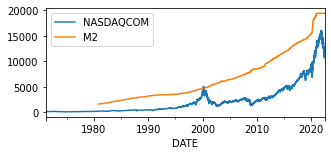

In [ ]:
from matplotlib import pyplot as plt
m2 = fdr.DataReader('M2', data_source='fred')
nq = fdr.DataReader('NASDAQCOM', data_source='fred')
M2_nas = fdr.DataReader(['M2', 'NASDAQCOM'], data_source='fred')
M2_nas.plot(figsize=(5,2))
print(M2_nas)

### StockListing(market)
: read stock list of stock exchanges. <br>

market = 'KRX'-KRX 종목 전체, 'KOSPI'-KOSPI 종목, 'KOSDAQ'-KOSDAQ 종목, 'KONEX'-KONEX 종목, 'NASDAQ'-나스닥 종목, 'NYSE'-뉴욕증권거래소 종목, 'SP500'-S&P500 종목

In [ ]:
stocks = fdr.StockListing('NASDAQ')
stocks.head(5)

100%|██████████| 4629/4629 [00:31<00:00, 146.34it/s]


,Symbol,Name,Industry,IndustryCode
0,AAPL,Apple Inc,"컴퓨터, 전화 및 가전제품",571060
1,MSFT,Microsoft Corp,소프트웨어 및 IT서비스,572010
2,AMZN,Amazon.com Inc,다양한 소매업,534020
3,GOOGL,Alphabet Inc Class A,소프트웨어 및 IT서비스,572010
4,TSLA,Tesla Inc,자동차 및 자동차 부품,531010


In [ ]:
# 상장폐지 종목 전체 리스트
krx_delisting = fdr.StockListing('KRX-DELISTING')
print(krx_delisting.head(2))

# 관리종목 리스트
krx_adm = fdr.StockListing('KRX-ADMINISTRATIVE')
print(krx_adm.head(2))

     Symbol     Name  Market SecuGroup Kind ListingDate DelistingDate Reason  \
0  06031012     3S R  KOSDAQ   신주인수권증서  보통주  2012-05-14    2012-05-21          
1  00684014  AK홀딩스8R   KOSPI   신주인수권증서  보통주  2014-07-28    2014-08-04          

  ArrantEnforceDate ArrantEndDate Industry  ParValue  ListingShares ToSymbol  \
0               NaT           NaT                0.0      1194422.0            
1               NaT           NaT                0.0      1278299.0            

  ToName  
0         
1         
   Symbol   Name DesignationDate                   Reason
0  001529  동양3우B      2022-01-03    종류주식 상장주식수 미달(5만주 미만)
1  003620    쌍용차      2021-04-16  반기검토의견 의견거절,회생절차개시신청,기타


## 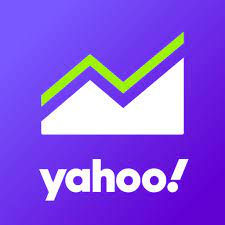 1.3 yfinance

https://pypi.org/project/yfinance/ <br>

yfinance는 Yahoo Finance에서 스크래핑 하는 python 모듈 입니다. <br>
해외는 정확하나, 국내는 트래픽에 따라 비정확하다는 단점이 있습니다.

대표적으로 사용하는 함수 두가지를 살펴보겠습니다. <br>
- Ticker(TickerBase) : Ticker로 항목을 받아와 다양한 메서드를 활용해 데이터를 수집
- download(tickers, start, end, actions, threads, group_by, auto_adjust, back_adjust, progress, period, show_errors, interval, prepost, proxy, rounding, timeout) : yahoo finance에서 ticker를 다운로드

In [ ]:
!pip3 install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf

### Ticker(TickerBase)
: Ticker로 항목을Ticker로 항목을 받아와 다양한 메서드 기반으로 각종 원하는 데이터를 수집, 가공 가능 <br> get_isin(), get_major_holders(), get_institutional_holders(), get_mutualfund_holders(), 
get_dividends(), 
get_splits(), 
get_actions(), 
get_shares(), 
get_info(), 
get_calendar() ...  <br>


In [ ]:
tesla = yf.Ticker("TSLA")
tesla_info = tesla.info

In [ ]:
teslaInfoStr = ""
i=0
while (i < len(tesla_info['longBusinessSummary'])):
  if(i%100 == 0):
    teslaInfoStr += "\n"
  teslaInfoStr += tesla_info['longBusinessSummary'][i]
  i += 1

print(teslaInfoStr)
print("")
print("")
print(tesla.financials)       #재무제표
print(tesla.major_holders)    #주주정보


Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generat
ion and storage systems in the United States, China, and internationally. The company operates in tw
o segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric ve
hicles, as well as sells automotive regulatory credits. It provides sedans and sport utility vehicle
s through direct and used vehicle sales, a network of Tesla Superchargers, and in-app upgrades; and 
purchase financing and leasing services. This segment is also involved in the provision of non-warra
nty after-sales vehicle services, sale of used vehicles, retail merchandise, and vehicle insurance, 
as well as sale of products to third party customers; services for electric vehicles through its com
pany-owned service locations, and Tesla mobile service technicians; and vehicle limited warranties a
nd extended service plans. The Energy Generation and Storage segment engages in the design

### download(tickers, start, end, actions, threads, group_by, auto_adjust, back_adjust, progress, period, show_errors, interval, prepost, proxy, rounding, timeout)
: Download yahoo tickers <br>


In [ ]:
data = yf.download("SPY AAPL", start="2017-01-01", end="2017-04-30")
data.head(3)

[*********************100%***********************]  2 of 2 completed


Adj Close                  Close                   High  \
                 AAPL         SPY       AAPL         SPY       AAPL   
Date                                                                  
2017-01-03  27.257647  204.625183  29.037500  225.240005  29.082500   
2017-01-04  27.227131  205.842529  29.004999  226.580002  29.127501   
2017-01-05  27.365593  205.679031  29.152500  226.399994  29.215000   

                              Low                   Open              \
                   SPY       AAPL         SPY       AAPL         SPY   
Date                                                                   
2017-01-03  225.830002  28.690001  223.880005  28.950001  225.039993   
2017-01-04  226.750000  28.937500  225.610001  28.962500  225.619995   
2017-01-05  226.580002  28.952499  225.479996  28.980000  226.270004   

               Volume            
                 AAPL       SPY  
Date                             
2017-01-03  115127600  91366500  
2017-01-04   84472400  78744400  
2017-01-05   88774400  78379000

# 2. 거시경제 데이터 수집


## 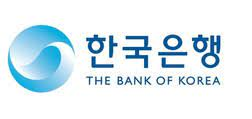 2-1. Ecos API  <br>

https://ecos.bok.or.kr/api/#/ <br>

ECOS는 통계자료를 신속하고 편리하게 제공하기 위해 한국은행이 운영하고 있는 통계전용 홈페이지입니다. <br>
총 596개 지표, 한국경제 이해를 도와주는 100대 지표, 시각화 통계, 화폐가치 계산 기능, 통계 설명자료 포함하고 있습니다. <br><br>

<font size=3>ECOS만의 장점<br>
ECOS는 우리나라의 대표적인 경제통계 포털로서 한국은행이 직접 생산하는 통계 뿐만 아니라 여러 통계기관에서 작성한 통계지표 중 정책수립이나 동향분석에 유용한 지표들도 함께 제공하고 있습니다. <br>
특히 한국은행은 통화/금융, 국민계정, 국제수지, 생산자물가 등 주요 거시경제 통계를 직접 작성하여 ECOS에 공표하기 때문에 가장 빠르고, 가장 정확합니다. <br>

> 통계 코드 검색 : https://ecos.bok.or.kr/api/#/DevGuide/StatisticalCodeSearch  
> 모바일 ver : 2개 이상의 통계표 조회 불가, 산업연관표 파일 다운로드 불가  
> 경제지표 참고 : https://www.bok.or.kr/portal/bbs/P0000605/list.do?menuNo=200462


ECOS API 활용 해보겠습니다. <br>
- EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)라는 함수를 만들어 활용 : statcode 값을 넣어, 금리, 소비자물가지수, 부동산가격지수 등의 데이터를 수집 가능

## ECOS API 함수
인증키발급을 받아 활용 할 수 있습니다.

In [ ]:
import datetime                     
import requests
import pandas as pd
from bs4 import BeautifulSoup

# ECOS 에서 데이터를 호출하는 함수를 만듭니다.
def EcosDownload(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3):
    url = 'http://ecos.bok.or.kr/api/StatisticSearch/Q6DB5O6BJUSU1LD6OZBQ/xml/kr/1/100000/%s/%s/%s/%s/%s/%s/%s/'%(Statcode, Freq, Begdate, Enddate, Subcode1, Subcode2, Subcode3)
    raw = requests.get(url)
    xml = BeautifulSoup(raw.text,'xml')

    # Pandas 데이터프레임으로 전환합니다.
    raw_data = xml.find_all("row")
    date_list = []
    value_list = []

    for item in raw_data:
        value = item.find('DATA_VALUE').text.encode('utf-8')
        date_str = item.find('TIME').text
        value = float(value)
        date_list.append(datetime.datetime.strptime(date_str,'%Y%m'))
        value_list.append(value)

    df = pd.DataFrame(index = date_list)
    df['value'] = value_list

    return df

In [ ]:
금리 = EcosDownload('722Y001', 'M', '202202', '202206', '0101000','','')
금리.head()

,value
2022-02-01,1.25
2022-03-01,1.25
2022-04-01,1.50
2022-05-01,1.75
2022-06-01,1.75


In [ ]:
소비자물가지수 = EcosDownload('901Y009', 'M', '202111', '202206', '0', '', '')
소비자물가지수.head()

,value
2021-11-01,103.87
2021-12-01,104.04
2022-01-01,104.69
2022-02-01,105.30
2022-03-01,106.06


In [ ]:
부동산가격지수 = EcosDownload('901Y064', 'M', '202111', '202206', 'P65B','','')
부동산가격지수.head()

,value
2021-11-01,0.429
2021-12-01,0.418
2022-01-01,0.368
2022-02-01,0.347
2022-03-01,0.359


# 3. 기업 공시데이터 수집

## 3-1. Dart API

https://github.com/FinanceData/OpenDartReader

Dart API는 공시검색, 기업개황, 공시서류원본파일, 고유번호를 호출 할 수 있습니다. <br>
이를 통해 기업 재무제표 데이터를 수집 할 수 있으며, DART OPEN API 인증키를 발급해야 사용이 가능합니다. 다른 API들과 달리 DART API는 호출시 StockCode가 아닌, Dart의 기업 고유번호(CorpCode)를 호출해야 합니다. <br>

Dart API 활용 해보겠습니다. <br>
- DartDownload(api_key,corp_code,bsns_year,reprt_code,fs_div,sj_div):라는 함수를 만들어 활용 : 

      api_key : Dart에서 발급받은 API KEY
      corp_code : 기업 고유번호
      bsns_year : 보고서 기준년도
      reprt_code : 11013(1분기), 11012(반기), 11014(3분기), 11011(사업)
      fs_div : OFS(개별재무제표), CFS(연결재무제표)
      sj_div : BS(재무상태표), IS(손익계산서), CIS(포괄손익계산서), CF(현금흐름표), SCE(자본변동표)

In [ ]:
!pip3 install dart-fss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 6.7 MB/s 
     |████████████████████████████████| 61 kB 6.0 MB/s 
     |████████████████████████████████| 41 kB 568 kB/s 
     |████████████████████████████████| 1.9 MB 58.5 MB/s 
     |████████████████████████████████| 62 kB 920 kB/s 
  Created wheel for arelle: filename=arelle-2.2-py3-none-any.whl size=2060307 sha256=dd9af40def4ea5d7af0f19f1a7f7a0580d93070a4ce94a87fc9c5cce60cab1f2
  Stored in directory: /root/.cache/pip/wheels/8c/b2/69/919f97f4f77fd85a26e52df16f1763d68cd18210acc9320ad5
  Created wheel for fake-useragent: filename=fake_useragent-0.1.11-py3-none-any.whl size=13502 sha256=4e5f901b2d8ee8012cfb6b40c7da72d7101aa51da4a9a2103cce602ff735d3a3
  Stored in directory: /root/.cache/pip/wheels/ed/f7/62/50ab6c9a0b5567267ab76a9daa9d06315704209b2c5d032031
  Created wheel for halo: filename=halo-0.0.31-py3-none-any.whl size=11261 sha256=ecd4e

In [ ]:
import dart_fss as dart

api_key='94503e351f0e1a5cee45c5dd7b0447b3ccd05fd0'
dart.set_api_key(api_key=api_key)
corp_list = dart.get_corp_list()
samsung = corp_list.find_by_corp_name(corp_name='삼성전자', exactly=True)[0]
samsung

Label,Data
corp_code,00126380
corp_name,삼성전자
stock_code,005930
modify_date,20220509
sector,통신 및 방송 장비 제조업
product,"IMT2000 서비스용 동기식 기지국,교환국장비,데이터단말기,동영상휴대폰,핵심칩,반도체제품,사무,계산 및 회계용기계"
corp_cls,Y


## Dart API 함수

In [ ]:
### 재무제표 데이터 호출 함수
def DartDownload(api_key,corp_code,bsns_year,reprt_code,fs_div,sj_div):
    url="https://opendart.fss.or.kr/api/fnlttSinglAcntAll.json?crtfc_key="+api_key+"&corp_code="+corp_code+"&bsns_year="+bsns_year+"&reprt_code="+reprt_code+"&fs_div="+fs_div
    raw = urlopen(url)
    rawjson_api = raw.read().decode("utf-8")
    json_file = json.loads(rawjson_api)
    data=json_file['list']
    list=[]
    for i in data:
        if i['sj_div']==sj_div:
            list.append(i)
    trmname_list=[list[0]['rcept_no']]
    df=pd.DataFrame(list)[['account_nm','thstrm_amount']]
    df.columns=['date',trmname_list[0][:8]]
    df=df.set_index('date')
    df=df.T
    df.index=pd.to_datetime(df.index)
    return df

## 회사고유번호 찾기, 데이터 불러오기

In [ ]:
import json
import pandas as pd
from pandas import json_normalize
from urllib.request import Request, urlopen
from urllib.parse import urlencode, quote_plus
from io import BytesIO
from zipfile import ZipFile
import xml.etree.ElementTree as ET

### 회사고유번호 데이터 불러오기

In [ ]:
url = 'https://opendart.fss.or.kr/api/corpCode.xml?crtfc_key='+api_key
with urlopen(url) as zipresp:
    with ZipFile(BytesIO(zipresp.read())) as zfile:
        zfile.extractall('corp_num')
tree = ET.parse('./corp_num/CORPCODE.xml')
root = tree.getroot()

### stock_code로 회사 고유번호 찾기

In [ ]:
def find_corp_num(stock_code):
    for country in root.iter("list"):
        if country.findtext("stock_code") == stock_code:
            return country.findtext("corp_code")

### DartDownload (삼성 corp_code : 00126380)

In [ ]:
DartDownload(api_key,'00126380',"2021","11011","OFS",'BS')

date,유동자산,현금및현금성자산,단기금융상품,매출채권,미수금,선급비용,재고자산,기타유동자산,비유동자산,기타포괄손익-공정가치금융자산,...,기타비유동부채,부채총계,자본금,우선주자본금,보통주자본금,주식발행초과금,이익잉여금(결손금),기타자본항목,자본총계,부채와자본총계
2022-03-08,73553416000000,3918872000000,15000576000000,33088247000000,1832488000000,817689000000,15973053000000,2922491000000,177558768000000,1662532000000,...,76697000000,57918452000000,897514000000,119467000000,778047000000,4403893000000,188774335000000,-882010000000,193193732000000,251112184000000


# 4. 금융데이터 핸들링

https://pandas.pydata.org/docs/reference/

판다스의 다양한 메서드를 활용해서 데이터 수집 시, 본인이 필요로 하는 형태로 데이터를 가공해서 활용 합니다. <br>
가장 대표적으로 많이 사용하는 4가지 메서드를 살펴 보겠습니다. <br>

핸들링을 위해 삼성전자 2021 - 2022 OHLCV 데이터를 가져와서 진행합니다.

In [ ]:
df_samsung = fdr.DataReader('005930', '2021','2022')
df_samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691358024691468
2021-01-05,81600,83900,81600,83900,35335669,0.010843373493975905
2021-01-06,83300,84500,82100,82200,42089013,-0.020262216924910592
2021-01-07,82800,84200,82700,82900,32644642,0.008515815085158085
2021-01-08,83300,90000,83000,88800,59013307,0.07117008443908324


## 4-1. shift
* shift : 인덱스 이동 
    - 전날/다음날 데이터를 Feature로 활용가능
    - 모델링 시 중요 (주가 예측 모델링 시 Target Feature 처리)

### 4.1.1 Change 값 직접 구해보기

In [ ]:
# Change = (종가 - 전일종가) - 1
# df_samsung["Change2"]
df_samsung["Change2"] = df_samsung["Close"] / df_samsung["Close"].shift(1) - 1

In [ ]:
# 불러온 값과 직접 구한 값이 같은지 확인하기
df_samsung[["Change","Change2"]]

,Change,Change2
Date,,
2021-01-04,0.024691358024691468,NaN
2021-01-05,0.010843373493975905,0.010843373493975905
2021-01-06,-0.020262216924910592,-0.020262216924910592
2021-01-07,0.008515815085158085,0.008515815085158085
2021-01-08,0.07117008443908324,0.07117008443908324
...,...,...
2021-12-24,0.007509386733416834,0.007509386733416834
2021-12-27,-0.003726708074534124,-0.003726708074534124
2021-12-28,0.0012468827930174342,0.0012468827930174342


### **4.1.2 pct_change 값 직접 구하기**
* pandas의 pct_change를 사용해서 구해볼 수도 있습니다.

In [ ]:
# pct_change = (종가/전일종가) - 1
df_samsung["pct_change"] = df_samsung["Close"].pct_change()
df_samsung.head()

,Open,High,Low,Close,Volume,Change,Change2,pct_change
Date,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691358024691468,NaN,NaN
2021-01-05,81600,83900,81600,83900,35335669,0.010843373493975905,0.010843373493975905,0.010843373493975905
2021-01-06,83300,84500,82100,82200,42089013,-0.020262216924910592,-0.020262216924910592,-0.020262216924910592
2021-01-07,82800,84200,82700,82900,32644642,0.008515815085158085,0.008515815085158085,0.008515815085158085
2021-01-08,83300,90000,83000,88800,59013307,0.07117008443908324,0.07117008443908324,0.07117008443908324


In [ ]:
# Diff 값 구하기
df_samsung["Diff"] = df_samsung["Close"].diff()

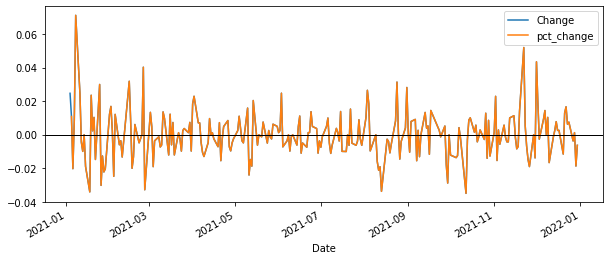

In [ ]:
# "Change", "pct_change" 시각화 하기
import matplotlib.pyplot as plt

df_samsung[["Change", "pct_change"]].plot(figsize=(10,4))
plt.axhline(0, c="k", lw=1)

## 4-2. 이동평균

통계학에서 이동평균(=롤링평균)은 전체 데이터 집합의 여러 하위 집합에 대한 일련의  평균을 만들어 데이터 요소를 분석하는 계산이며,  
이동산술평균(Moving Mean) 또는 롤링산술평균(Rolling Mean)이라고도 합니다. 
<br>  
일련의 연속된 숫자와 고정된 부분 집합 크기가 주어지면, 이동 평균의 첫 번째 요소는 연속된 숫자의 첫 고정 부분 집합의 평균을 취하여 구한다. 
그 다음, "앞으로 이동"하여 하위 집합을 변경한다. 즉, 부분 집합의 첫 번째 숫자를 제외하고 연속된 숫자의 다음 값을 포함시킨다.  
<br>  
* 이동평균의 종류
    * 단순이동평균(Simple Moving Average)
    * 누적이동평균(Cumulative Moving Average)
    * 가중이동평균(Weighted Moving Average)
    * 지수이동평균(Exponential Moving Average)

### **4.2.1 rolling**

* rolling : 이동평균선 계산시 활용

* window : 몇 개의 데이터를 가지고 연산을 할 것인지 결정  
> 의미 : window가 클수록 부드러운 선의 형태를 가지고 있음. window가 center에 있지 않으면, window는 클수록 위상 차가 큼  
* min_periode : 최소한 몇 개의 데이터가 있어야 연산을 할 것인지 결정  
> window 안의 데이터가 min_period보다 적다면, 결과는 NaN  
* center : window의 위치를 window 끝으로 할 것인지 중간으로 할 것인지 결정  
> 의미 : 시계열 데이터에서는 window를 중간으로 할 수 없음(미래의 데이터는 볼 수 없기에)  
* <font color=pink>연산을 mean()으로 했을 경우 "rolling"은 전체적으로 진짜 데이터에서 **잡음(noise)을 제거**하라는 의미</font>

### **4.2.2 expanding**

* window : expanding에서는 window를 결정하지 않음  
> 왜냐하면 window의 크기가 순차적으로 증가하기 때문  
* min_periods : 최소한 몇 개의 데이터가 있어야 연산을 할 것인지 결정  
> rolling과 같음  
* expanding에서의 sum()은 cumsum() 연산과 동일하게 진행되나 NaN이 있을 경우, expanding은 무난하게 처리할 수 있음  
* 연산을 sum()으로 했을 경우, cumsum()과 같은 의미가 있음  
* <font color=pink>연산을 mean()으로 했을 경우, "expanding"은 전체적으로 **추세**를 찾는 의미가 있음</font>  

<br>
<img src = "https://camo.githubusercontent.com/3a6ea642e3bb375103e2099630ffb7e62bd00f7fd8400f36e662a11f06f79288/68747470733a2f2f692e696d6775722e636f6d2f6d4342614362642e706e67">

In [ ]:
df_samsung['avgFiveDay'] = df_samsung['Close'].rolling(window=5).mean()
df_samsung.head(5)

,Open,High,Low,Close,Volume,Change,Change2,pct_change,Diff,avgFiveDay,SMA7,SMA14,CMA7,EWM_short,EWM_long
Date,,,,,,,,,,,,,,,
2021-01-04,81000,84400,80200,83000,38655276,0.024691358024691468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"83,000.0","83,000.0"
2021-01-05,81600,83900,81600,83900,35335669,0.010843373493975905,0.010843373493975905,0.010843373493975905,900.0,NaN,NaN,NaN,NaN,"83,487.5","83,467.30769230769"
2021-01-06,83300,84500,82100,82200,42089013,-0.020262216924910592,-0.020262216924910592,-0.020262216924910592,"-1,700.0",NaN,NaN,NaN,NaN,"82,984.98845265589","83,011.97634302612"
2021-01-07,82800,84200,82700,82900,32644642,0.008515815085158085,0.008515815085158085,0.008515815085158085,700.0,NaN,NaN,NaN,NaN,"82,958.16091954023","82,980.67265083513"
2021-01-08,83300,90000,83000,88800,59013307,0.07117008443908324,0.07117008443908324,0.07117008443908324,"5,900.0","84,160.0",NaN,NaN,NaN,"84,545.36771910466","84,330.19866549778"


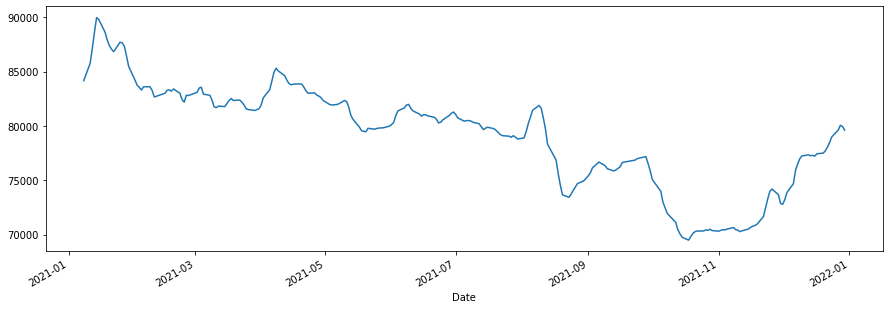

In [ ]:
df_samsung['avgFiveDay'].plot(figsize=(15,5))
plt.show()

### 4.2.3 단순이동평균(SMA : Simple Moving Average) 
* rolling을 사용합니다.

In [ ]:
# 7일, 14일 단순 이동평균 구하기
df_samsung["SMA7"] = df_samsung["Close"].rolling(7).mean()
df_samsung["SMA14"] = df_samsung["Close"].rolling(14).mean()

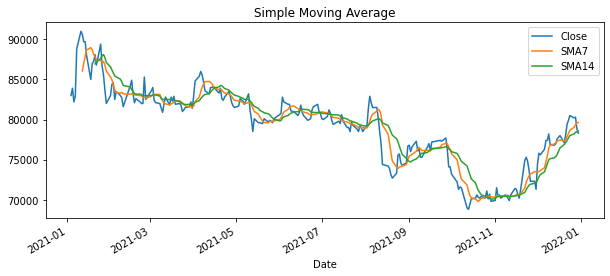

In [ ]:
# 단순이동평균 시각화
df_samsung[["Close", "SMA7", "SMA14"]].plot(figsize=(10,4), title="Simple Moving Average")

### 4.2.4 누적이동평균(Cumulative Moving Average)
* window 창이 시간의 흐름에 따라 증가하기 때문에, expanding을 사용합니다.

In [ ]:
# expanding을 사용하면 window가 시간의 흐름에 따라 증가.
df_samsung["CMA7"] = df_samsung["Close"].expanding(7).mean()

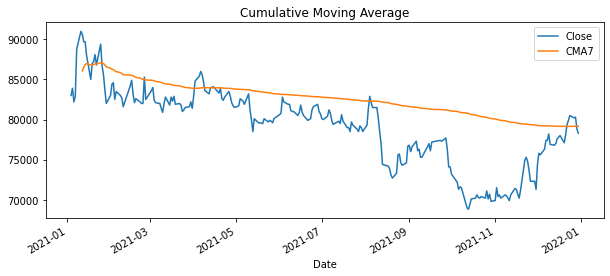

In [ ]:
# 누적이동평균 시각화
df_samsung[["Close","CMA7"]].plot(figsize=(10,4), title="Cumulative Moving Average")

### 4.2.5 지수이동평균(Exponential Moving Average)
* 최근 자료에 가중치를 부여하여 최근 가격 변동을 잘 나타냅니다.

In [ ]:
# 최근 자료에 가중치를 더 주도록 지수 이동평균을 구합니다.
df_samsung["EWM_short"] = df_samsung["Close"].ewm(span=12).mean() # 12거래일로 span 지정
df_samsung["EWM_long"] = df_samsung["Close"].ewm(span=26).mean()
# MACD 지표 사용할 때 주로 활용된다.

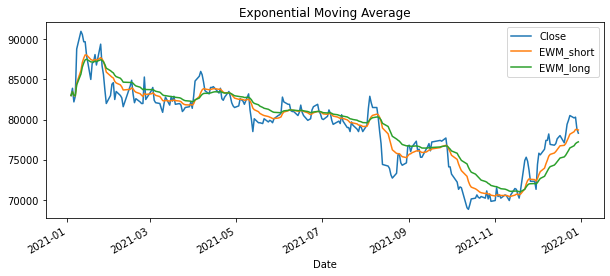

In [ ]:
df_samsung[["Close","EWM_short","EWM_long"]].plot(figsize=(10,4), title="Exponential Moving Average")

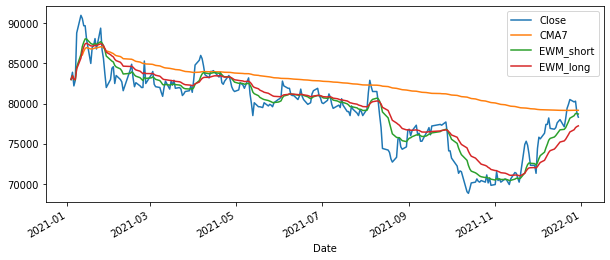

In [ ]:
# 다양한 이동평균 비교하기
df_samsung[["Close", "CMA7", "EWM_short", "EWM_long"]].plot(figsize=(10,4))

* 표 분석

> CMA : window_size가 점점 증가하므로, 가장 완만한 형태
> SMA7 : 종가와 비슷한 흐름.  
> EWM_long : 종가에 비해 조금 완만한 형태

## 4-3. resample

* resample : 기간별 집계 (일단위, 월단위, 연단위)
    - 타 데이터와의 시간 단위를 통일하기 위해 활용
    - 기간별 통계치를 집계하여 추세 확인 가능 
* first() : 그룹 내부에서 첫 번째 데이터를 선택
* last() : 마지막 데이터를 사용

In [ ]:
df_samsung = stock.get_market_ohlcv_by_date("20220101", "20220708", "005930")
mon = df_samsung.resample('M').first()
print(mon)

               시가     고가     저가     종가       거래량
날짜                                              
2022-01-31  79400  79800  78200  78600  13502112
2022-02-28  74900  74900  73300  73300  17744721
2022-03-31  72300  72400  71500  71700  12481430
2022-04-30  69500  69500  69000  69100  15916846
2022-05-31  66600  67600  66500  67300  14106184
2022-06-30  66600  67000  66400  66700  14959443
2022-07-31  56900  57500  55900  56200  24982097


In [ ]:
month_first = df_samsung.resample('MS').first()
month_first.head()

,시가,고가,저가,종가,거래량
날짜,,,,,
2022-01-01,79400,79800,78200,78600,13502112
2022-02-01,74900,74900,73300,73300,17744721
2022-03-01,72300,72400,71500,71700,12481430
2022-04-01,69500,69500,69000,69100,15916846
2022-05-01,66600,67600,66500,67300,14106184


## 4-4. pct_change

* pct_change : 수익률(단순 수익률)/변화율 계산
    - 단순 수익률로 누적수익률 계산시 오차 존재 (백테스팅 or 모델링시 문제)
    - 로그수익률 계산 필요
    - 로그 수익률 계산식 : pd.DataFrame(np.log(df['가격']) - np.log(df['가격'].shift(1)))

In [ ]:
df_samsung['수익률'] = df_samsung['종가'].pct_change()
df_samsung.head()

,시가,고가,저가,종가,거래량,수익률
날짜,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,NaN
2022-01-04,78800,79200,78300,78700,12427416,0.0012722646310432406
2022-01-05,78800,79000,76400,77400,25470640,-0.016518424396442133
2022-01-06,76700,77600,76600,76900,12931954,-0.006459948320413411
2022-01-07,78100,78400,77400,78300,15163757,0.01820546163849146


In [ ]:
df_samsung['수익률%'] = df_samsung['수익률']*100
df_samsung.head()

,시가,고가,저가,종가,거래량,수익률,수익률%
날짜,,,,,,,
2022-01-03,79400,79800,78200,78600,13502112,NaN,NaN
2022-01-04,78800,79200,78300,78700,12427416,0.0012722646310432406,0.12722646310432406
2022-01-05,78800,79000,76400,77400,25470640,-0.016518424396442133,-1.6518424396442133
2022-01-06,76700,77600,76600,76900,12931954,-0.006459948320413411,-0.6459948320413411
2022-01-07,78100,78400,77400,78300,15163757,0.01820546163849146,1.820546163849146


# 5. 백테스팅 API 활용법


## **5.1 백테스팅 원리**
1. Vectorized Backtesting
- 과거 데이터를 하나의 벡터화(numpy, pandas)하여, 백테스팅을 이 벡터들간의 연산으로 진행하는 것. 수백-수천개의 과거데이터를 한번에 처리할 수 있기 때문에 빠르다는 장점이 있습니다.
2. Event-Based Backtesting
- 위의 방법처럼 과거데이터를 하나로 묶어서 벡터화를 하는 것이 아닌, 데어터가 실제 이용가능한 시점을 event화 하여, 실제 각각의 데이터를 event마다 받아서 백테스팅하는 방법. 느리지만, 실제 주식시장에서의 로직을 그대로 반영하기 때문에 최소한의 코드 수정으로 실전에 바로 투입할 수 있다는 장점이 있습니다.

<br>

**Single Indicator(지표) backtesting**
* reset_index()
* boolean selection, DataFrame arithmetic operation, dtype 변환
* groupby() & aggregation
* join(), pivot()
* visualization

### 5.1.1 DataFrame Multiplication

In [ ]:
a = pd.DataFrame([[1,2], [3, np.nan], [5,6]], columns=["a","b"])
b = pd.DataFrame([[1,2,3], [3,4,5], [5,6,7]], columns=["c","b","d"])*10
print(a, b, sep="\n")

   a   b
0  1 2.0
1  3 NaN
2  5 6.0
    c   b   d
0  10  20  30
1  30  40  50
2  50  60  70


In [ ]:
a * b

,a,b,c,d
0,NaN,40.0,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,360.0,NaN,NaN


In [ ]:
# 백테스팅 로직 이해하기
# 수익률 DataFrame
return_df = pd.DataFrame(
    [
        [np.nan, np.nan, 2000  ],
        [3000,      np.nan, 3000  ],
        [5000,      6000,   np.nan],
    ],
    columns=["삼성", "현대", "SK"]
)

# 주식 종목 Selection DataFrame
asset_on_df = pd.DataFrame(
    [
        [0, 1],
        [0, 1],
        [1, 0],
    ],
    columns=["삼성", "SK"]
)

print(return_df, asset_on_df, sep="\n")

       삼성      현대      SK
0     NaN     NaN 2,000.0
1 3,000.0     NaN 3,000.0
2 5,000.0 6,000.0     NaN
   삼성  SK
0   0   1
1   0   1
2   1   0


In [ ]:
# 3가지 종목으로 구성된 포트폴리오 수익률
return_df * asset_on_df

,SK,삼성,현대
0,"2,000.0",NaN,NaN
1,"3,000.0",0.0,NaN
2,NaN,"5,000.0",NaN


In [ ]:
# 평균수익률 구하기
(return_df * asset_on_df).mean(axis=1)

0   2,000.0
1   1,500.0
2   5,000.0
dtype: float64

In [ ]:
# 0 --> np.nan으로 바꿔주기
asset_on_df = asset_on_df.replace(0, np.nan)
return_df * asset_on_df

,SK,삼성,현대
0,"2,000.0",NaN,NaN
1,"3,000.0",NaN,NaN
2,NaN,"5,000.0",NaN


In [ ]:
# 매수한 종목에 대해서 평균 수익률 다시 구한 값
(return_df * asset_on_df / 1000).mean(axis=1)

0   2.0
1   3.0
2   5.0
dtype: float64

### **INSIGTHS**
주어진 종목에 대해, <font color=pink>'동일가중'방식</font>으로 투자하기 때문에, 단순히 mean()만으로 전체 포트폴리오의 평균 수익률을 구할 수 있습니다.  
만약, 투자한 금액의 비중이 다르면?

## **5.2 백테스팅 API : backtesting.py**
<img src="https://imgs.xkcd.com/comics/engineer_syllogism.png">

> backtesting.py : https://kernc.github.io/backtesting.py/doc/backtesting/#gsc.tab=0  
> User Guide : https://kernc.github.io/backtesting.py/doc/examples/Quick%20Start%20User%20Guide.html

In [ ]:
!pip3 install backtesting

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 7.1 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173832 sha256=481a2efe6a15c9a1248d613296074b8845a668a14042ce6b17afbd7ad634870e
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


### Data

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover
from backtesting.test import GOOG

GOOG.tail()

/usr/local/lib/python3.7/dist-packages/backtesting/_plotting.py:50: UserWarning: Jupyter Notebook detected. Setting Bokeh output to notebook. This may not work in Jupyter clients without JavaScript support (e.g. PyCharm, Spyder IDE). Reset with `backtesting.set_bokeh_output(notebook=False)`.
  warnings.warn('Jupyter Notebook detected. '


,Open,High,Low,Close,Volume
2013-02-25,802.3,808.41,790.49,790.77,2303900
2013-02-26,795.0,795.95,784.4,790.13,2202500
2013-02-27,794.8,804.75,791.11,799.78,2026100
2013-02-28,801.1,806.99,801.03,801.2,2265800
2013-03-01,797.8,807.14,796.15,806.19,2175400


### Strategy

In [ ]:
import pandas as pd

def SMA(values, n):
    return pd.Series(values).rolling(n).mean()

In [ ]:
from backtesting import Strategy
from backtesting.lib import crossover


class SmaCross(Strategy):
    # Define the two MA lags as *class variables*
    # for later optimization
    n1 = 10
    n2 = 20
    
    def init(self):
        # Precompute the two moving averages
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
    
    def next(self):
        # If sma1 crosses above sma2, close any existing
        # short trades, and buy the asset
        if crossover(self.sma1, self.sma2):
            self.position.close()
            self.buy()

        # Else, if sma1 crosses below sma2, close any existing
        # long trades, and sell the asset
        elif crossover(self.sma2, self.sma1):
            self.position.close()
            self.sell()

In [ ]:
%%script echo

    def next(self):
        if (self.sma1[-2] < self.sma2[-2] and
                self.sma1[-1] > self.sma2[-1]):
            self.position.close()
            self.buy()

        elif (self.sma1[-2] > self.sma2[-2] and    # Ugh!
              self.sma1[-1] < self.sma2[-1]):
            self.position.close()
            self.sell()

### Backtesting

In [ ]:
from backtesting import Backtest

bt = Backtest(GOOG, SmaCross, cash=10_000, commission=.002)
stats = bt.run()
stats

Start                     2004-08-19 00:00:00
End                       2013-03-01 00:00:00
Duration                   3116 days 00:00:00
Exposure Time [%]           97.06703910614524
Equity Final [$]           68,221.96986000001
Equity Peak [$]            68,991.21986000001
Return [%]                  582.2196986000001
Buy & Hold Return [%]       703.4582419772772
Return (Ann.) [%]          25.266426719390832
Volatility (Ann.) [%]       38.38300814823962
Sharpe Ratio               0.6582711449245711
Sortino Ratio              1.2887794382233386
Calmar Ratio               0.7637475148882401
Max. Drawdown [%]         -33.082172088099156
Avg. Drawdown [%]          -5.581506190343247
Max. Drawdown Duration      688 days 00:00:00
Avg. Drawdown Duration       41 days 00:00:00
# Trades                                   94
Win Rate [%]                54.25531914893617
Best Trade [%]              57.11930956177456
Worst Trade [%]            -16.62989845236693
Avg. Trade [%]             2.07432

In [ ]:
bt.plot()

Row(id='1433', ...)

### Optimization

In [ ]:
%%time

stats = bt.optimize(n1=range(5, 30, 5),
                    n2=range(10, 70, 5),
                    maximize='Equity Final [$]',
                    constraint=lambda param: param.n1 < param.n2)
stats

Backtest.optimize:   0%|          | 0/2 [00:00<?, ?it/s]

CPU times: user 264 ms, sys: 49.6 ms, total: 313 ms
Wall time: 5.12 s


In [ ]:
stats._strategy

<Strategy SmaCross(n1=10,n2=15)>

In [ ]:
bt.plot(plot_volume=False, plot_pl=False)

Row(id='2029', ...)

### Trade data

In [ ]:
stats.tail()

Expectancy [%]                                    1.979879611046259
SQN                                              1.6041576316815624
_strategy                                     SmaCross(n1=10,n2=15)
_equity_curve                             Equity          Drawdo...
_trades                Size  EntryBar  ExitBar         EntryPric...
dtype: object

In [ ]:
stats['_equity_curve']

,Equity,DrawdownPct,DrawdownDuration
2004-08-19,"10,000.0",0.0,NaT
2004-08-20,"10,000.0",0.0,NaT
2004-08-23,"10,000.0",0.0,NaT
2004-08-24,"10,000.0",0.0,NaT
2004-08-25,"10,000.0",0.0,NaT
...,...,...,...
2013-02-25,"103,035.52611999982",0.048853534060204096,NaT
2013-02-26,"102,952.32611999982",0.04962157387080324,NaT
2013-02-27,"104,206.82611999982",0.038040973601612516,NaT
2013-02-28,"104,391.42611999983",0.03633688527184553,NaT


In [ ]:
stats['_trades']

,Size,EntryBar,ExitBar,EntryPrice,ExitPrice,PnL,ReturnPct,EntryTime,ExitTime,Duration
0,87,20,60,114.64884,185.23,"6,140.560919999998",0.615629080939676,2004-09-17,2004-11-12,56 days
1,-87,60,69,184.85953999999998,175.8,788.1799799999974,0.04900769524797033,2004-11-12,2004-11-26,14 days
2,96,69,71,176.1516,180.71,437.6064000000006,0.02587770988171556,2004-11-26,2004-11-30,4 days
3,-96,71,75,180.34858,179.13,116.98368000000028,0.006756803962637226,2004-11-30,2004-12-06,6 days
4,97,75,82,179.48826,177.99,-145.3312199999988,-0.008347398320090571,2004-12-06,2004-12-15,9 days
...,...,...,...,...,...,...,...,...,...,...
148,139,2085,2111,689.1555599999999,735.54,"6,447.437160000006",0.06730619716686315,2012-11-29,2013-01-08,40 days
149,-139,2111,2113,734.0689199999999,742.83,"-1,217.7901200000147",-0.011934955644219425,2013-01-08,2013-01-10,2 days
150,136,2113,2121,744.3156600000001,735.99,"-1,132.2897600000115",-0.011185657440016872,2013-01-10,2013-01-23,13 days
151,-136,2121,2127,734.51802,750.51,"-2,174.9092800000017",-0.02177207306636264,2013-01-23,2013-01-31,8 days
